<a href="https://colab.research.google.com/github/pratikrocks03/DataScienceProjects/blob/main/weather_forecasting_mechademy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 3.0 MB/s 
     |████████████████████████████████| 172 kB 10.2 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from neuralprophet import NeuralProphet
import pickle

**Loading the dataset**

In [3]:
df=pd.read_csv('Weather_data(mechademy).csv')
df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


**Analyzing the Patterns from the Datset**

In [4]:
# Conds(condition)
df.conds.unique()

array(['Smoke', 'Clear', 'Haze', 'Unknown', 'Scattered Clouds',
       'Shallow Fog', 'Mostly Cloudy', 'Fog', 'Partly Cloudy',
       'Patches of Fog', 'Thunderstorms and Rain', 'Overcast', 'Rain',
       'Light Rain', 'Light Drizzle', 'Drizzle', 'Mist', 'Volcanic Ash',
       'Thunderstorm', 'Light Thunderstorms and Rain',
       'Light Thunderstorm', 'Squalls', 'Heavy Rain', 'Light Haze',
       'Sandstorm', 'Widespread Dust', 'Funnel Cloud',
       'Heavy Thunderstorms and Rain', 'Heavy Thunderstorms with Hail',
       'Light Rain Showers', 'Thunderstorms with Hail', nan,
       'Partial Fog', 'Light Fog', 'Heavy Fog', 'Blowing Sand',
       'Light Hail Showers', 'Light Sandstorm', 'Light Freezing Rain',
       'Rain Showers'], dtype=object)

In [5]:
# Columns
df.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [6]:
# Checking Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime_utc  98913 non-null  object 
 1   conds         98845 non-null  object 
 2   dewptm        98294 non-null  float64
 3   fog           98913 non-null  int64  
 4   hail          98913 non-null  int64  
 5   heatindexm    29111 non-null  float64
 6   hum           98160 non-null  float64
 7   precipm       0 non-null      float64
 8   pressurem     98682 non-null  float64
 9   rain          98913 non-null  int64  
 10  snow          98913 non-null  int64  
 11  tempm         98244 non-null  float64
 12  thunder       98913 non-null  int64  
 13  tornado       98913 non-null  int64  
 14  vism          94497 non-null  float64
 15  wdird         84533 non-null  float64
 16  wdire         84533 non-null  object 
 17  wgustm        1063 non-null   float64
 18  windchillm    573 non-null

In [7]:
# Handling Date columns
df['Date']=pd.to_datetime(df['datetime_utc'])
df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm,Date
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4,1996-11-01 11:00:00
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN,1996-11-01 12:00:00
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN,1996-11-01 13:00:00
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN,1996-11-01 14:00:00
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0,1996-11-01 16:00:00


In [8]:
# Dropping datetime_utc column
del df['datetime_utc']

**EDA**

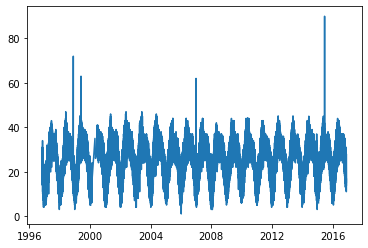

In [9]:
# Temprature over time
plt.plot(df['Date'], df['tempm'])
plt.show()

So visualization is looking nice without any break.

In [10]:
# Reseting Date and temprature column
data=df[['Date', 'tempm']]
data.dropna(inplace=True)
data.columns=['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [11]:
data

,ds,y
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0
...,...,...
98908,2016-11-30 12:30:00,21.0
98909,2016-11-30 13:00:00,19.0
98910,2016-11-30 15:00:00,17.0
98911,2016-11-30 18:00:00,15.0


**Train Model**

In [12]:
m=NeuralProphet()
m.fit(data, freq="D", epochs=500)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64


  0%|          | 0/349 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.09E-02, min: 9.06E-01


  0%|          | 0/349 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.61E-02, min: 8.04E-01


  0%|          | 0/349 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.51E-02, min: 9.06E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.70E-02
Epoch[500/500]: 100%|██████████| 500/500 [29:32<00:00,  3.54s/it, SmoothL1Loss=0.0032, MAE=2.3, RMSE=2.94, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.462497,30.323625,38.517114,0.0
1,0.045926,8.431316,10.327170,0.0
2,0.004552,2.760311,3.487809,0.0
3,0.003505,2.416153,3.077466,0.0
4,0.003357,2.362951,3.011020,0.0
...,...,...,...,...
495,0.003207,2.302443,2.940685,0.0
496,0.003206,2.301322,2.941788,0.0
497,0.003205,2.301564,2.940940,0.0
498,0.003205,2.301901,2.940702,0.0


So we got 2.3 MAE and we can say model is trained well.

**Forecast Away**

In [18]:
future=m.make_future_dataframe(data, periods=500)
forecast=m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2016-12-01 21:00:00,None,14.368225,NaN,25.687250,-7.919410,-0.039538,-3.360076
1,2016-12-02 21:00:00,None,14.236741,NaN,25.687960,-8.110750,0.019608,-3.360076
2,2016-12-03 21:00:00,None,14.084807,NaN,25.688673,-8.302091,0.058302,-3.360076
3,2016-12-04 21:00:00,None,13.793980,NaN,25.689384,-8.493333,-0.041996,-3.360076
4,2016-12-05 21:00:00,None,13.634113,NaN,25.690096,-8.684353,-0.011553,-3.360076


In [19]:
future

,ds,y
0,2016-12-01 21:00:00,None
1,2016-12-02 21:00:00,None
2,2016-12-03 21:00:00,None
3,2016-12-04 21:00:00,None
4,2016-12-05 21:00:00,None
...,...,...
495,2018-04-10 21:00:00,None
496,2018-04-11 21:00:00,None
497,2018-04-12 21:00:00,None
498,2018-04-13 21:00:00,None


In [20]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
495,2018-04-10 21:00:00,None,26.730045,NaN,26.039316,4.049639,0.001168,-3.360076
496,2018-04-11 21:00:00,None,26.926800,NaN,26.040026,4.232839,0.014011,-3.360076
497,2018-04-12 21:00:00,None,27.053179,NaN,26.040739,4.412055,-0.039538,-3.360076
498,2018-04-13 21:00:00,None,27.288216,NaN,26.041449,4.587236,0.019608,-3.360076
499,2018-04-14 21:00:00,None,27.498735,NaN,26.042160,4.758350,0.058302,-3.360076


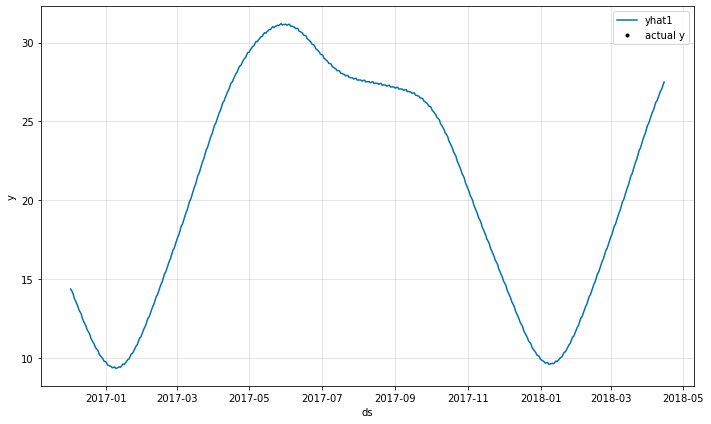

In [21]:
# Plotting the forecast
plot1=m.plot(forecast)

So this is the forecast through graph and its looking constantly decreasing.

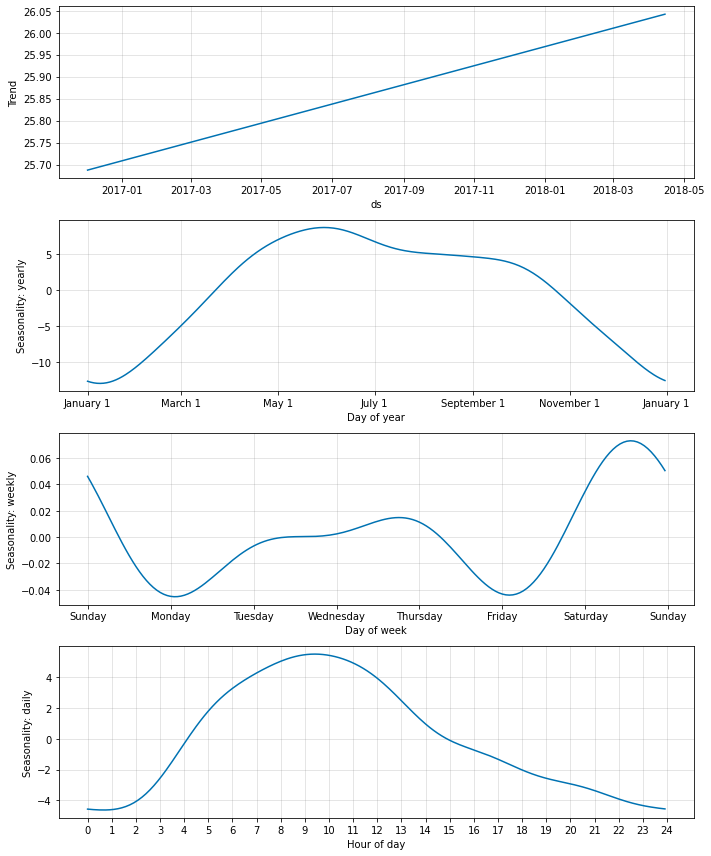

In [22]:
# plotting overall trend
plot2 =m.plot_components(forecast)

**Saving Model**

In [23]:
with open('forecast_model.pkl',"wb") as f:
  pickle.dump(m,f)

In [30]:
m